In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('INvideos.csv')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [3]:
df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [4]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

                                                    CATEGORY AND CONTENT INSIGHTS

In [5]:
df.drop("description", axis=1, inplace=True)
df.drop("tags", axis=1, inplace=True)

Since we don't need the "description" and the "tags" column for our analysis, its good for us to drop them

In [6]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

### Mapping Category IDs to Names

The dataset contains `category_id` for each video.  
To make category-based analysis meaningful and understandable, we need the **actual category names**.  

The category names are stored in a JSON file (`IN_category_id.json`).  
We extract the category names from the JSON and map them to the corresponding `category_id` in the dataset.


In [7]:
import pandas as pd
import json


# Load the JSON category file
with open("IN_category_id.json", "r") as f:
    category_data = json.load(f)


# Extract items from JSON
categories = category_data['items']

# Create dictionary mapping
category_mapping = {}
for item in categories:
    cat_id = int(item['id'])  # convert to int if CSV has int IDs
    cat_name = item['snippet']['title']
    category_mapping[cat_id] = cat_name

print(category_mapping)  # optional, to check


{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [8]:
df['category_name'] = df['category_id'].map(category_mapping)
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Film & Animation
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,News & Politics
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Entertainment


In [9]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
category_name             105
dtype: int64

In [10]:
df['category_name'] = df['category_name'].fillna('Unknown')


In [11]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
category_name             0
dtype: int64

In [12]:
df['category_name'].value_counts()

category_name
Entertainment           16712
News & Politics          5241
Music                    3858
Comedy                   3429
People & Blogs           2624
Film & Animation         1658
Education                1227
Howto & Style             845
Sports                    731
Science & Technology      552
Shows                     205
Unknown                   105
Autos & Vehicles           72
Gaming                     66
Movies                     16
Travel & Events             8
Pets & Animals              3
Name: count, dtype: int64

The above analysis represents the number of videos per category

In [13]:
trending_categories = df.groupby("category_name")["views"].sum()

#Top categories

top_categories = trending_categories.sort_values(ascending=False).head(10)
print(top_categories)

category_name
Entertainment           16120390974
Music                   10150844485
Film & Animation         3847149504
Comedy                   2887672070
News & Politics          1994263812
Sports                   1379949159
People & Blogs           1364104242
Howto & Style             737343593
Science & Technology      477111016
Gaming                    274722506
Name: views, dtype: int64


Above are the top 10 categories with most viewers

                                                **CHANNELS AND CREATORS INSIGHTS**

In [14]:
Channel_views = df.groupby("channel_title")['views'].sum()

#Least viewd channels
Least_viewed = Channel_views.sort_values(ascending=True).head(10)
print(Least_viewed)

channel_title
News VIdeo                                7573
Wide Angle Pictures                      11337
Viral in India                           11391
Reporter Roy                             11816
Pakkatv                                  13443
Pooja Luthra                             14155
Skylark Pictures Entertainment           14752
Smart Series                             15314
MFIP                                     16137
Tamil News World - தமிழ் செய்தி உலகம்    16336
Name: views, dtype: int64


Above are the **top 10** Youtube channels with the least total views

In [15]:
#most watched

Most_viewed = Channel_views.sort_values(ascending=False).head(10)
print(Most_viewed)

channel_title
T-Series                       2124607907
Marvel Entertainment           1280396202
FoxStarHindi                   1260807619
Amit Bhadana                   1024252169
Speed Records                   801739414
Sony Pictures Entertainment     772261898
Zee Music Company               694640267
Goldmines Telefilms             643826504
Dude Perfect                    598578613
YRF                             573884674
Name: views, dtype: int64


Above are the **top 10** youtube channels with most total views

### Channels Dominating Specific Categories

To identify which channels perform best in each category, we analyze how frequently a channel appears in the trending videos list for that category.  

This helps us understand:
- Which creators consistently trend in a specific category (e.g., *Music, Entertainment*).

We’ll group the dataset by both `category_name` and `channel_title`, 
and count the number of trending videos for each combination.


In [16]:
channel_category = df.groupby(["channel_title","category_name"]).size().reset_index(name='video_count')

cateogry_domination = channel_category.sort_values('video_count',ascending=False)

#Top channels per category

Top_channels_per_category = cateogry_domination.drop_duplicates(subset=['category_name'],keep='first')
print(Top_channels_per_category)

            channel_title         category_name  video_count
1604       etvteluguindia         Entertainment          282
334        ETV Plus India                Comedy          253
332        ETV Jabardasth        People & Blogs          234
1208             T-Series                 Music          221
1302     Technical Guruji  Science & Technology          215
1190   Study IQ education             Education          213
1443       V6 News Telugu       News & Politics          212
14        5-Minute Crafts         Howto & Style          173
1476            VikatanTV                 Shows          166
560        Kabaddi365.com                Sports          124
443   Goldmines Telefilms      Film & Animation          114
344               Emm Pee               Unknown           62
256        Clash of Clans                Gaming           29
126         Autocar India      Autos & Vehicles           17
1029          Rhythm Boyz                Movies           14
1244           TV9 Telug

These are the most dominant youtube channels inn each content category

                                                      ****Engagement Metrics***

Correlation between likes, dislikes, views and comments.

In [17]:
correlation = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
print(correlation)

                  views     likes  dislikes  comment_count
views          1.000000  0.850096  0.543294       0.674195
likes          0.850096  1.000000  0.494560       0.780514
dislikes       0.543294  0.494560  1.000000       0.708125
comment_count  0.674195  0.780514  0.708125       1.000000


***Correlation tells us how much two variable move together, which can help creators to focus on categories that have high views and engagement correlation***

From the above correlation analysis we understand that,

views and likes have a Strong correlation,
views and dislikes have a Moderate correlaion,
views and comment_count have a Moderate to strong correlation.

In [18]:
df['Engagement_rate'] = ((df['comment_count'] + df['likes'])/df['views'])*100
df

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_name,Engagement_rate
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Film & Animation,3.178614
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,News & Politics,0.124555
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Entertainment,0.455708
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,Comedy,5.877378
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,Entertainment,0.120255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,Comedy,1.626566
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,Entertainment,0.775266
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Entertainment,0.495187
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Entertainment,0.585738


The Engagement rate tells us which content is more lkely to involve large number of people.A higher engagement indicates high involvement of viewrs
**note** :- Engagement rate is only meaningful for videos with high viewership, as videos with low views can often show a high engagement rate

                                                            **Data Visualization**

**Relationship and correlation**

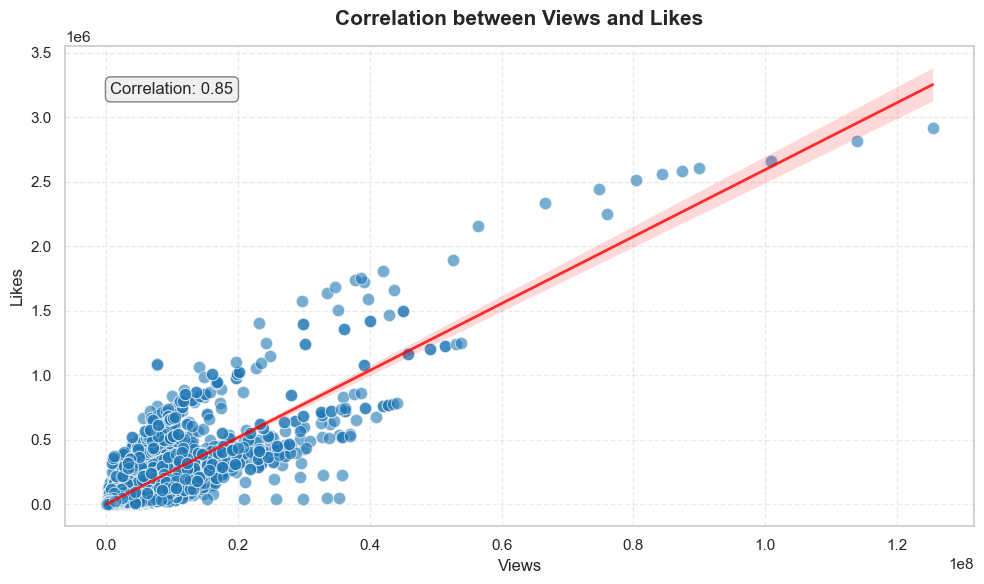

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='views', y='likes', alpha=0.6, color='#1f77b4',edgecolor='white', s=80)

# Adding regression line for trend
sns.regplot(data=df,x='views',y='likes',scatter=False,color='red',line_kws={'lw': 2, 'alpha': 0.8})

# Titles and labels
plt.title('Correlation between Views and Likes', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Views', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Correlation annotation
corr_value = df['views'].corr(df['likes'])
plt.text(0.05, 0.9, f'Correlation: {corr_value:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="#f0f0f0", ec="gray", lw=1)
)

plt.tight_layout()
plt.show()


**The scatter plot shows the relationship between likes and views. A strong positive correlation indicates that as viewership increases, the number of likes tends to rise as well, suggesting that popular videos also receive strong audience appreciation**

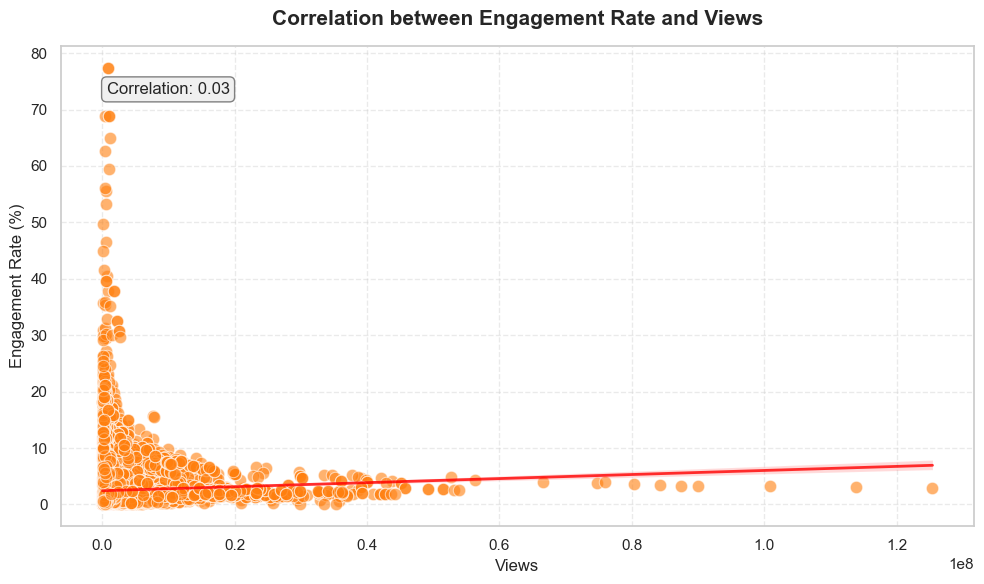

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Scatterplot
sns.scatterplot(data=df,x='views',y='Engagement_rate',alpha=0.6,color='#ff7f0e',edgecolor='white',s=80)

# Regression line
sns.regplot(data=df,x='views',y='Engagement_rate',scatter=False,color='red',line_kws={'lw': 2, 'alpha': 0.8})

# Titles and labels
plt.title('Correlation between Engagement Rate and Views', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Views', fontsize=12)
plt.ylabel('Engagement Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Correlation value
corr_value = df['views'].corr(df['Engagement_rate'])
plt.text(0.05, 0.9,f'Correlation: {corr_value:.2f}',transform=plt.gca().transAxes,fontsize=12,bbox=dict(boxstyle="round,pad=0.3", fc="#f0f0f0", ec="gray", lw=1))

plt.tight_layout()
plt.show()


This plot explores whether higher-view videos also maintain high audience engagement.  
As we can clearly see that views aand engagement rate have a very weak correlation, it  suggests that higher viewership does not mean high audience engagement 


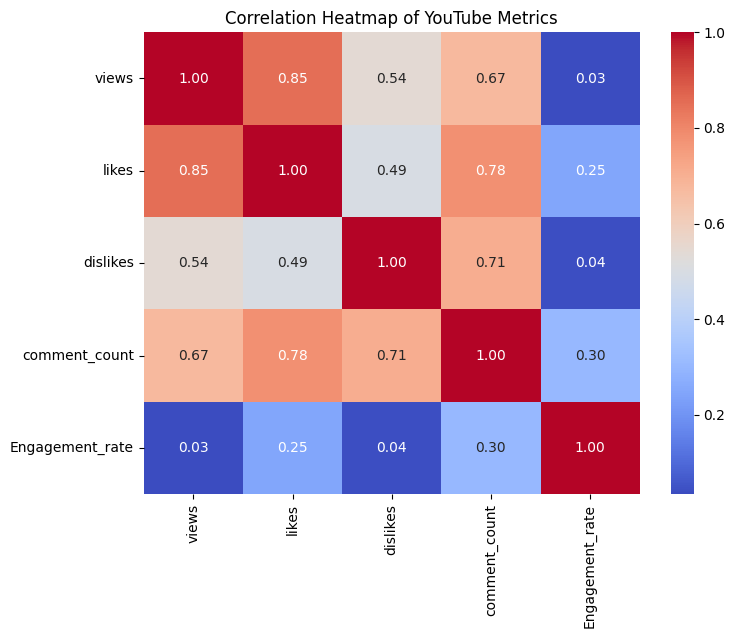

In [ ]:
#Correlation of heatmap

plt.figure(figsize=(8,6))
corr = df[['views','likes','dislikes','comment_count','Engagement_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of YouTube Metrics')
plt.show()


The correlation heatmap shows the strength and direction of relationships between key engagement metrics such as views, likes, dislikes, and comments.
A high positive correlation (closer to 1) between views and likes/comments indicates that videos with higher reach also attract more audience interaction.
A weak or negative correlation (closer to 0 or -1) suggests less consistent audience behavior across metrics.

**Category and Channel analysis**

In [21]:
df['like_dislike_ratio'] = df['likes'] / (df['likes'] + df['dislikes'])


C:\Users\acer\AppData\Local\Temp\ipykernel_31352\3181131974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratio.values, y=category_ratio.index, palette='coolwarm')
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not

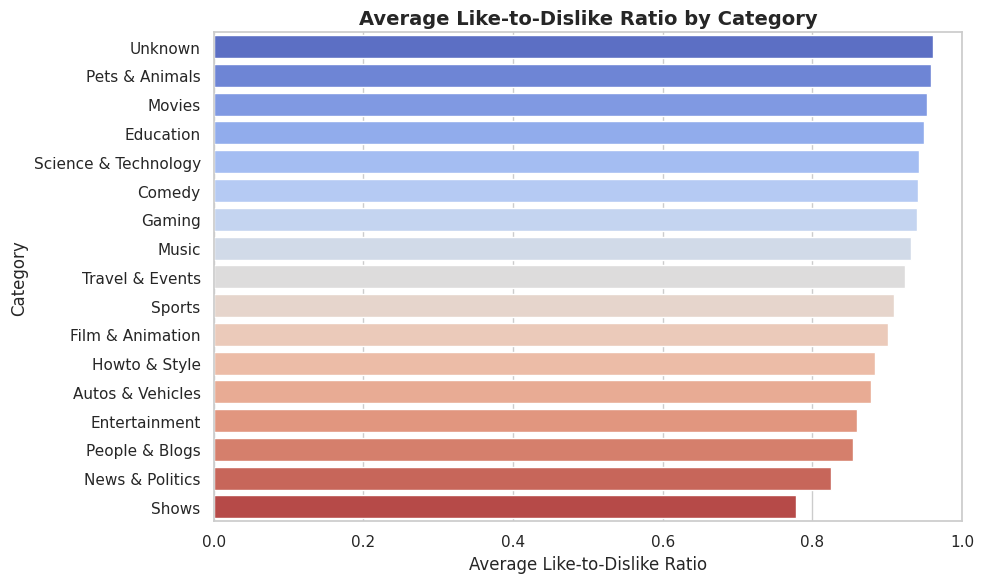

In [26]:
category_ratio = df.groupby('category_name')['like_dislike_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_ratio.values, y=category_ratio.index, palette='coolwarm')
plt.title('Average Like-to-Dislike Ratio by Category', fontsize=14, weight='bold')
plt.xlabel('Average Like-to-Dislike Ratio')
plt.ylabel('Category')
plt.xlim(0,1)
plt.tight_layout()
plt.show()


This shows which categories receive the highest proportion of likes.
Categories near 1.0 tend to attract more satisfied viewers.

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unic

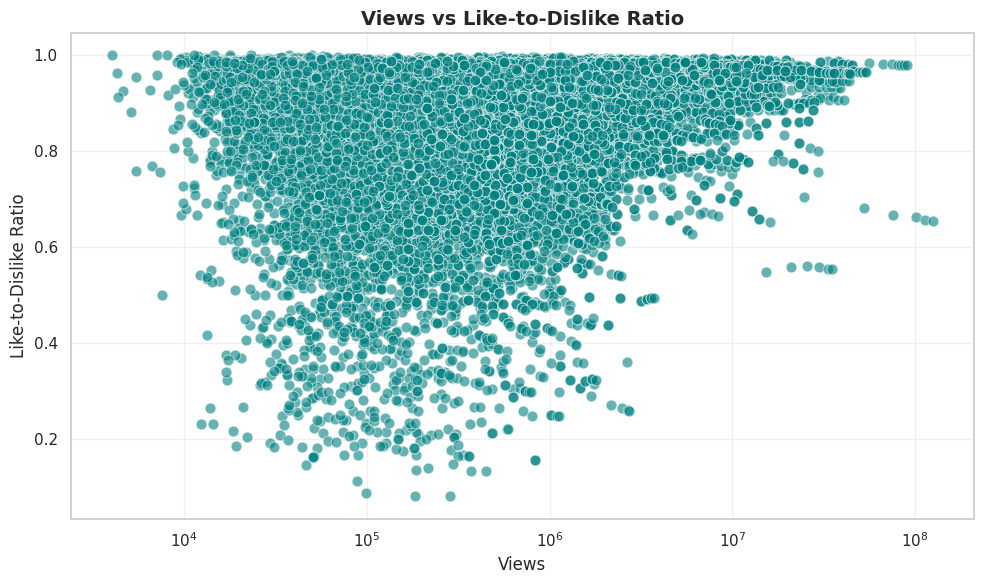

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='views', y='like_dislike_ratio', alpha=0.6, color='teal', s=60)
plt.title('Views vs Like-to-Dislike Ratio', fontsize=14, weight='bold')
plt.xlabel('Views')
plt.ylabel('Like-to-Dislike Ratio')
plt.xscale('log')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Most videos cluster near the top (ratio ≈ 1.0)
- This means most YouTube videos get far more likes than dislikes, showing generally positive engagement.

The ratio doesn’t strongly depend on views
- There isn’t a clear upward or downward trend — so:

Highly viewed videos don’t necessarily have higher (or lower) like-to-dislike ratios.
In other words, popularity doesn’t directly affect how positively people react.

A few scattered points lower on the plot
- These represent videos with poor audience reception (more dislikes relative to likes).
They exist across different view counts — meaning any video can flop, regardless of reach.

Dense clustering between 0.8–1.0 ratio
- Suggests that the majority of creators maintain good audience approval, even when the video is not viral.

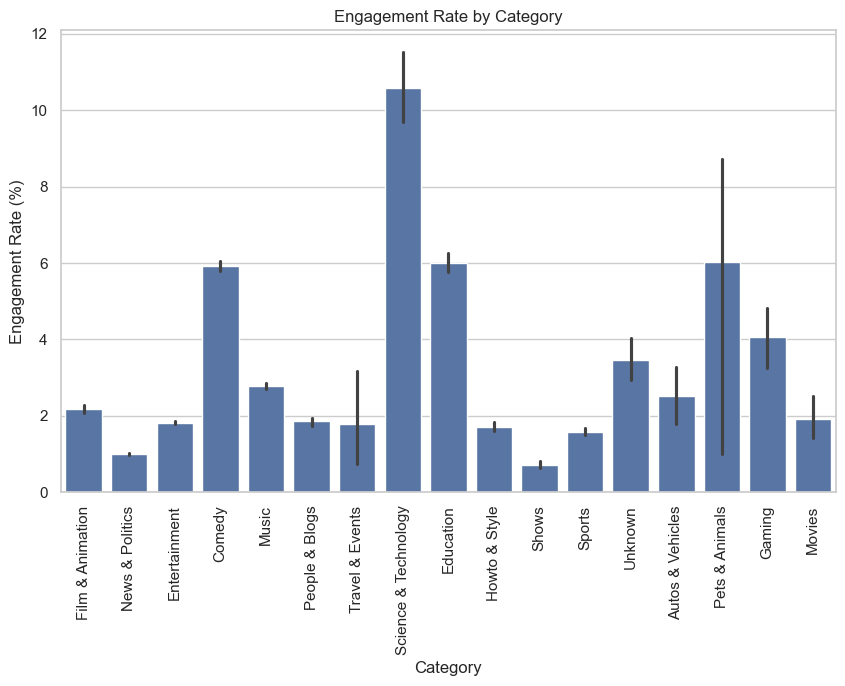

In [ ]:
#Engagement Rate by Category
plt.figure(figsize=(10,6))
sns.barplot(x='category_name', y='Engagement_rate', data=df,)
plt.title('Engagement Rate by Category')
plt.xlabel('Category')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=90)
plt.show()


From the above chart we understand that,Engagement rate is not directly tied to popularity.
Categories like Music or Entertainment may dominate views, but Education and Travel dominate engagement quality.
So if a creator aims for a loyal, interactive audience, focusing on Education or Travel content could be more rewarding than chasing views in Music or Entertainment.

C:\Users\acer\AppData\Local\Temp\ipykernel_27248\3047993338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_views.values,y=category_views.index,palette='viridis')


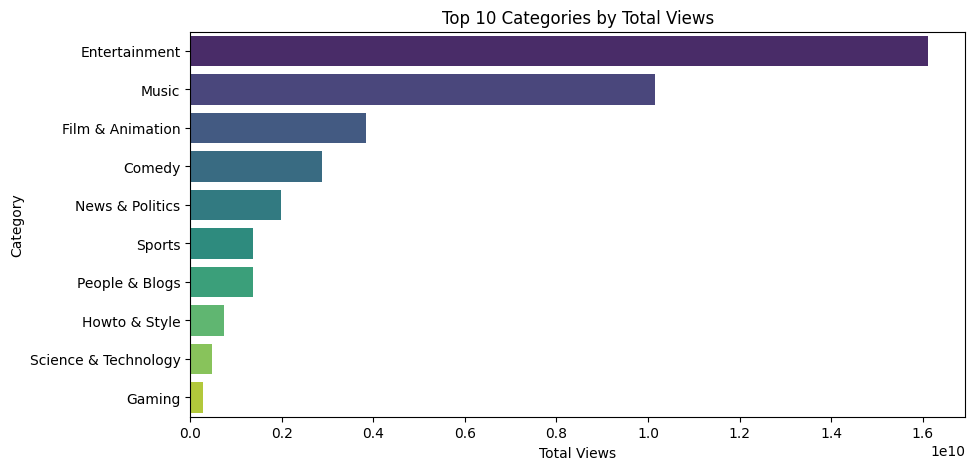

In [ ]:
#Top 10 categories by total views

category_views = df.groupby('category_name')['views'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=category_views.values,y=category_views.index,palette='viridis')

plt.title('Top 10 Categories by Total Views')
plt.xlabel('Total Views')
plt.ylabel('Category')
plt.show()


The above chart Explains us that categories like Entertainment and music dominate the viewership charts.
So if a creator aims for a large number of viewers or a massive audience, focusing on these catrgories could be rewarding.

C:\Users\acer\AppData\Local\Temp\ipykernel_27248\3700239906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='cool')


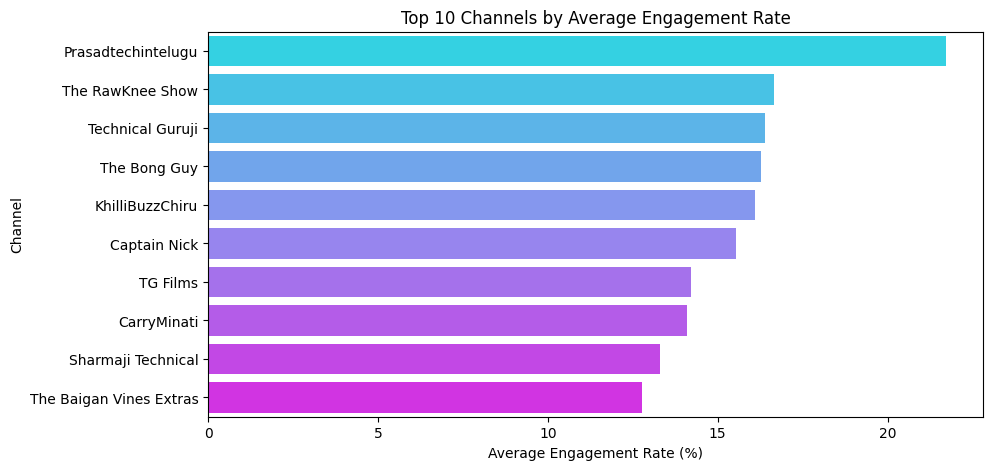

In [ ]:
top_channels = df.groupby('channel_title')['Engagement_rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='cool')
plt.title('Top 10 Channels by Average Engagement Rate')
plt.xlabel('Average Engagement Rate (%)')
plt.ylabel('Channel')
plt.show()


This visualization highlights the top 10 YouTube channels with the highest average engagement rates.
These creators maintain strong audience relationships, with viewers who actively like, comment, or interact with their content — indicating genuine audience interest rather than just high viewership.

**CONCLUSION**


The analysis of YouTube trending videos provides several key insights into audience behavior and content performance:

Viewership Trends: Categories such as Entertainment, Music, and People & Blogs dominate in total views, indicating their mass appeal and consistent audience demand.

Engagement Insights: Although some categories have high view counts, others like Education or How-to & Style show comparatively higher engagement rates, suggesting more loyal and interactive audiences.

Channel Performance: The top-performing channels maintain strong engagement levels, demonstrating that consistent content quality and niche audience targeting play a crucial role in viewer retention.

Correlation Analysis: A strong positive correlation exists between views and likes, showing that videos with higher reach tend to receive more appreciation from viewers. However, engagement rate is more meaningful for videos with substantial viewership, as low-view videos can produce misleadingly high engagement values.

Overall Insight: Popularity (views) doesn’t always equal engagement — while viral videos reach a wider audience, channels with moderate views but high engagement often enjoy more genuine audience interaction.